# Employee Salary

A polynomial regression model to forecast employee's salary.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Create Sample Data

Let's create a sample dataset where the relationship between the years of experience, education, and salary is non-linear.

- Crete a sample data
- Assign the sample data to a variable as a DataFrame, `employees`
- Preview the first five (5) rows

In [3]:
data = {
    'experience_years': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'education_years': [10, 11, 11, 12, 13, 14, 14, 15, 15, 16],
    'salary': [40000, 45000, 50000, 58000, 65000, 73000, 80000, 92000, 110000, 130000]
}

employees = pd.DataFrame(data)
employees.head()

,experience_years,education_years,salary
0,1,10,40000
1,2,11,45000
2,3,11,50000
3,4,12,58000
4,5,13,65000


Here, we create a sample dataset with two independent variables: `experience_years` (years of experience) and `education_years` (years of education), and a dependent variable `salary`.

## Visualize the Data

- Visualize the relationship between independent variables (`experience_years` and `education_years`) and the dependent variable (`salary`). 

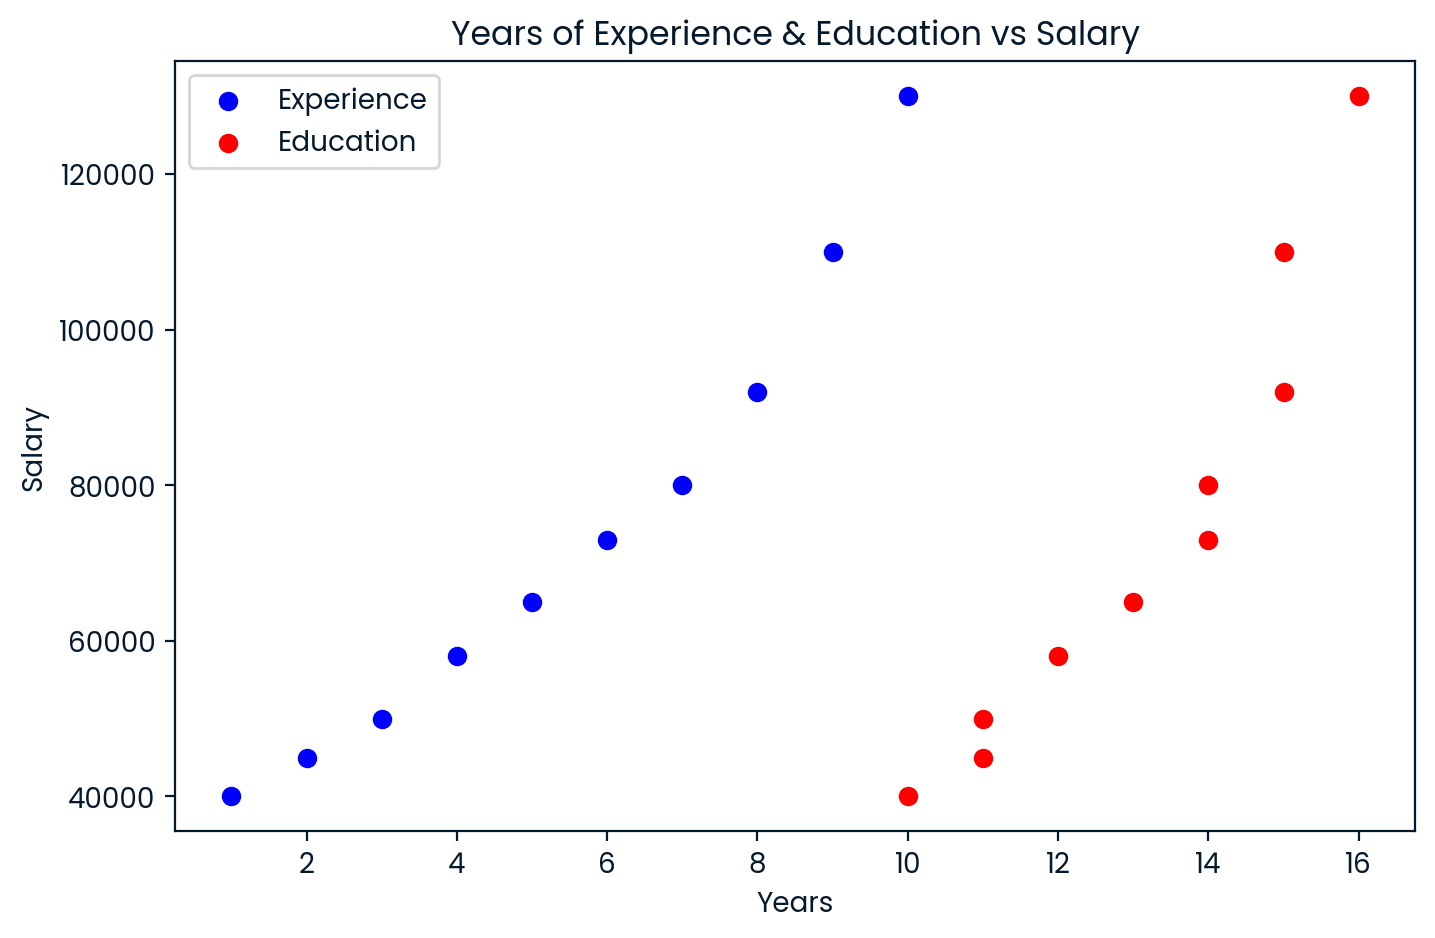

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(employees['experience_years'], employees['salary'], color='blue', label='Experience')
plt.scatter(employees['education_years'], employees['salary'], color='red', label='Education')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Years of Experience & Education vs Salary')
plt.legend()
plt.show()

You can see the relationshiip appears non-linear, suggesting that Polynomial Regression might be appropriate.

## Define Features and Target Variable

These will be used to train the model.

In [6]:
X = employees[['experience_years', 'education_years']]
y = employees['salary']

## Split Data into Training and Testing Sets

We split the data into training and testing sets, with 80% of the data used for training and 20% for testing. This helps in evaluating how well the model generalizes to unseen data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Generate Polynomial Features

- Generate polynomial features of degree 2 using `PolynomialFeatures`
    - Our model will consider all combinations of the features up to degree 2 (e.g., `experience_years`, `education_years`, `experience_years^2`, `experience_years*education_years`, and etc.) 

In [8]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

- The `fit_transform` method fits the polynomial features to the training data and transforms it accordingly.
- The `transform` method is used to apply the same transformation to the test data.

## Build and Train the Model

- Create a `LinearRegression` model
- Train it using the polynomial features that was generated

In [9]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

Even though we’re using a linear regression model, the inclusion of polynomial features allows it to capture non-linear relationships.

## Make Predictions

- Use the trained model to predict the salaries for the test set based on the polynomial features

In [10]:
y_pred = model.predict(X_poly_test)

## Evaluaate the Model

- Use Mean Squared Error (MSE) to measure the average squared difference between the predicted and actual values
- R-squared indicates how well the model explains the variance in the data
    - If the R-squared close to 1, it suggest that the model explains most of the variability in the response data 

*NOTE: A lower MSE indicates a better fit.*

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Preview the Evaluation

In [13]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 56990408.16323768
R-squared: 0.9366773242630693


- R-squared of **0.9367** indicates that the model explains approximately 93.67 of the variance in the dataset variable (`salary`) based on the independent variables (`experience_years` and `education_years`). This is generally considered a good fit as it suggests that the model captures most of the variability in the data.
- The MSE of **56,990,408.16** is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

## Visualize the Results

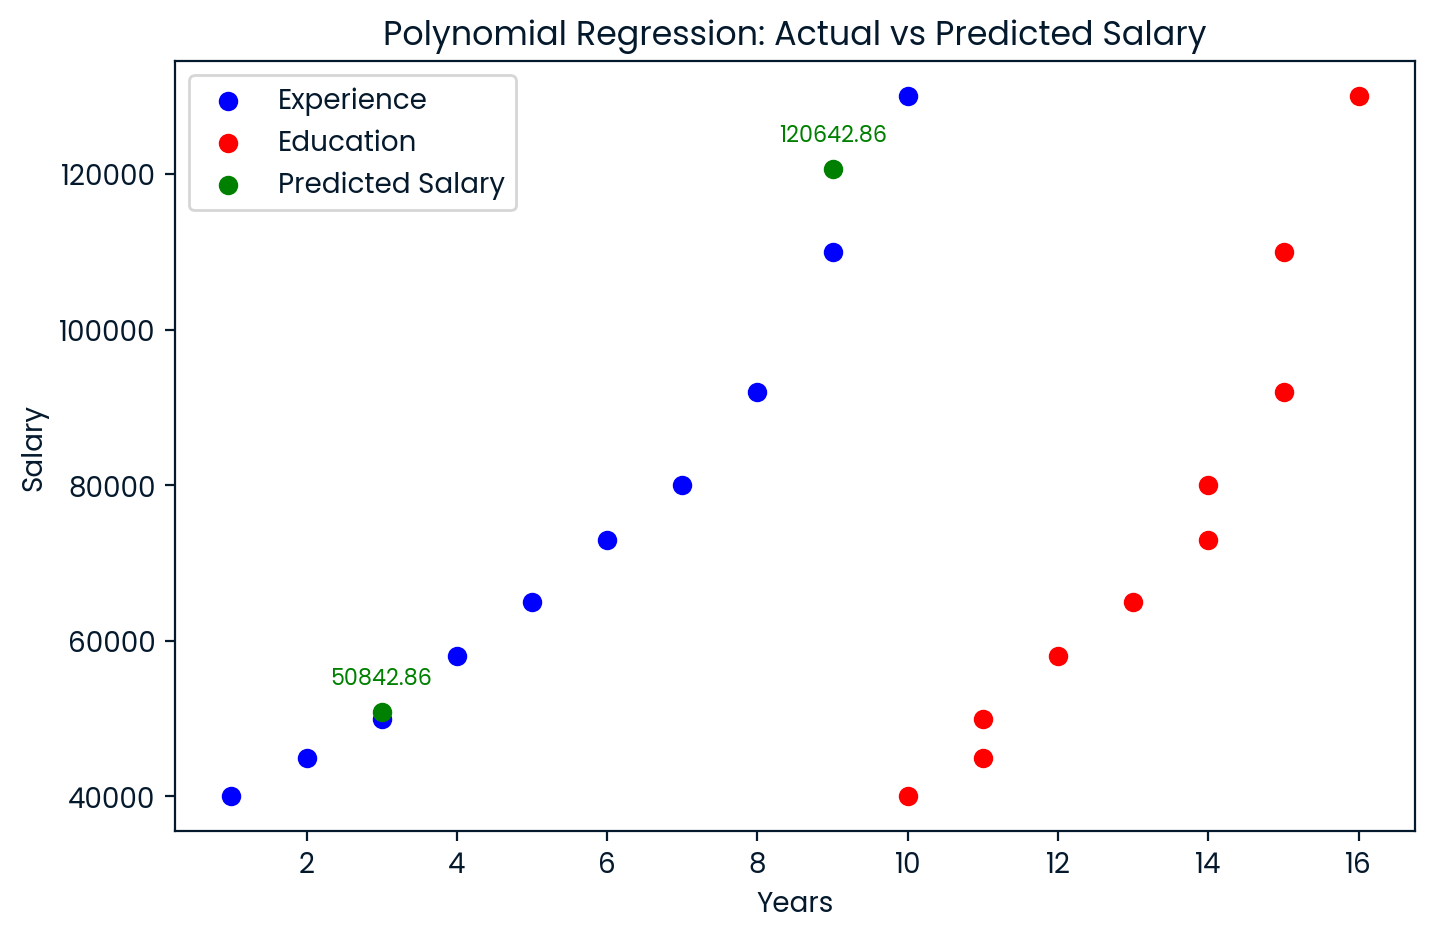

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(employees['experience_years'], employees['salary'], color='blue', label='Experience')
plt.scatter(employees['education_years'], employees['salary'], color='red', label='Education')
plt.scatter(X_test['experience_years'], y_pred, color='green', label='Predicted Salary')

# Annotate the predicted salary points
for i, txt in enumerate(y_pred):
    plt.annotate(f'{txt:.2f}', (X_test['experience_years'].iloc[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Actual vs Predicted Salary')
plt.legend()
plt.show()

This visualization shows the original data points alongside the predicted salaries from the polynomial regression model. The green points represents the predicted salaries based on the model, showing how well the model captures the non-linear relationship in the data.